<a href="https://colab.research.google.com/github/FHnt97/RUG_TOM_SIO/blob/main/Assignment_A_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment A.4
## Part 1

**Authors:** Group 2.1

*   V. Stupko			S2367246
*   S. Zuidhoek			S4190947
*   R. van der Straten		S3125327	
*   F. Höhne Tarragona		S4605632

**Course:** Smart Industry Operations *EBM223A05.2021-2022.1B*

**Lecturer:** *Dr Christos Emmanouilidis*

***2022-01-14***

<br>

In the first part of the assignment, it is asked to make a salary offer to employees based on a data analysis. In this respect, a list with historical data of employees is available including mean salary numbers and specific skills and charateristics. The objective is to make a salary offer based on a data analysis about what should be the expected level of salary for a given skillset. This can be considered as a regression model in which the offer should be just below this expected level and more specifically at 95% of the expected level.

This part of te report is divided into sections as follows:
1. Importing libraries and data
2. Data analysis and basic data clearning
3. Exploratory analysis of data (correlation analysis)
4. Set-up of regression model
5. Results and conclusion



---



## 1. Importing of libraries and data set

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initially, we read the data file and identify its charateristics.

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/SIO - Group 2.1 (S1b)/A4 (14.01.2022)/A4_1.csv', sep=',')
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total
0,2008676LWE,Sheldon,Wold,male,25,13/02/1996,0,5,design,China,57,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,67773.17534
1,6946901SAL,Jennifer,Golka,female,27,05/11/1994,1,5,marketing,Luxembourg,33,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,75374.99057
2,1094956XBR,Rose,Dooley,female,65,12/11/1956,8,4,sales,Romania,52,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,72796.63579
3,2915219VKT,Susan,Hickman,female,47,28/12/1973,21,4,operations,China,93,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,75963.93030
4,0144998MUS,Orlando,Hilker,male,45,23/05/1976,16,6,innovation,Poland,87,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,98462.56868


## 2. Initial data analysis and cleaning




We would like to know more about which data is present in the set including the data type. From this overview, we can see that there are no NA values. It becomes clear that 'date of birth' is an object, which should be converted to datetime. Furthermore, the 'total' column is charaterized as a flow, which should be an integer as it represents the salary.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecID                400 non-null    object 
 1   First Name           400 non-null    object 
 2   Surname              400 non-null    object 
 3   Gender               400 non-null    object 
 4   Age                  400 non-null    int64  
 5   Date of birth        400 non-null    object 
 6   Years of experience  400 non-null    int64  
 7   Education Level      400 non-null    int64  
 8   Department           400 non-null    object 
 9   Country              400 non-null    object 
 10  Performance          400 non-null    int64  
 11  EN                   400 non-null    int64  
 12  F                    400 non-null    int64  
 13  SP                   400 non-null    int64  
 14  NL                   400 non-null    int64  
 15  GE                   400 non-null    int

In [ ]:
df['Date of birth'] = pd.to_datetime(df['Date of birth'])

In [ ]:
df['Total'] = df['Total'].astype('int64')

Below, important data columns are checked on consistency and cleaned accordingly. For gender, 'm' and 'f' are made consistent to the syntax of 'male' and 'female'.

In [ ]:
df['Gender'].unique()

array(['male', 'female', 'm', 'f'], dtype=object)

In [ ]:
df['Gender'] = df['Gender'].replace(['f','m'],['female','male'])

For the years of experience it is cheched that no faulty and negative values are present, which is indeed true.

In [ ]:
df['Years of experience'].describe()

count    400.000000
mean      10.325000
std        9.119061
min        0.000000
25%        1.750000
50%        9.000000
75%       16.000000
max       35.000000
Name: Years of experience, dtype: float64

The same is cheched for age. It can be seen that there are no underage employees present.

In [ ]:
df['Age'].describe()

count    400.000000
mean      42.602500
std       13.932868
min       18.000000
25%       31.000000
50%       43.000000
75%       54.000000
max       67.000000
Name: Age, dtype: float64

Moreover, a uniform performance measure is applied with a score instead of a letter.

In [ ]:
df['Performance'].unique()

array([ 57,  33,  52,  93,  87,  82,  32,  64,  86,  44,   6,  15,  48,
        26, 100,  84,  89,  80,  63,  66,  88,  13,  85,  92,  41,  76,
        65,  50,  68,  36,   7,  95,  62,  10,  74,  47,   4,  81,  55,
        58,  91,  60,  46,  27,  56,  49,  23,  19,  28,  61,  34,  16,
        96,  73,   0,  43,  78,  21,  67,  97,  79,  39,  29,  42,  25,
        22,  11,  35,  71,  45,  83,  24,  38,  18,  31,  77,  54,  90,
        69,  94,  17,   8,  75,   5,  98,  53,  12,   3,  37,  51,  20,
        14,  59,  70,  99,   9,   2,  72,  40])

## 3. Exploratory analysis of data

In order to investigate possible correlations between the data types, we would like to sum the 'number of languages' and the 'number of skills', which is done below.

In [ ]:
df['Number of languages'] = df[['EN', 'IT', 'GE', 'NL', 'SP', 'F']].sum(axis=1)

In [ ]:
df['Number of skills'] = df[['Assembly', 'Machining', 'Welding', 'Additive', 'Painting', 'Control', 'Quality', 'Planning', 'Services', 'Shipping']].sum(axis=1)

In [ ]:
df.head()

,RecID,First Name,Surname,Gender,Age,Date of birth,Years of experience,Education Level,Department,Country,Performance,EN,F,SP,NL,GE,IT,Assembly,Machining,Welding,Additive,Painting,Control,Quality,Planning,Services,Shipping,Total,Number of languages,Number of skills
0,2008676LWE,Sheldon,Wold,male,25,1996-02-13,0,5,design,China,57,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,67773,4,7
1,6946901SAL,Jennifer,Golka,female,27,1994-05-11,1,5,marketing,Luxembourg,33,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,75374,3,5
2,1094956XBR,Rose,Dooley,female,65,1956-12-11,8,4,sales,Romania,52,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,72796,3,4
3,2915219VKT,Susan,Hickman,female,47,1973-12-28,21,4,operations,China,93,1,1,0,1,0,0,1,1,1,1,0,0,0,1,1,0,75963,3,6
4,0144998MUS,Orlando,Hilker,male,45,1976-05-23,16,6,innovation,Poland,87,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,98462,5,8


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


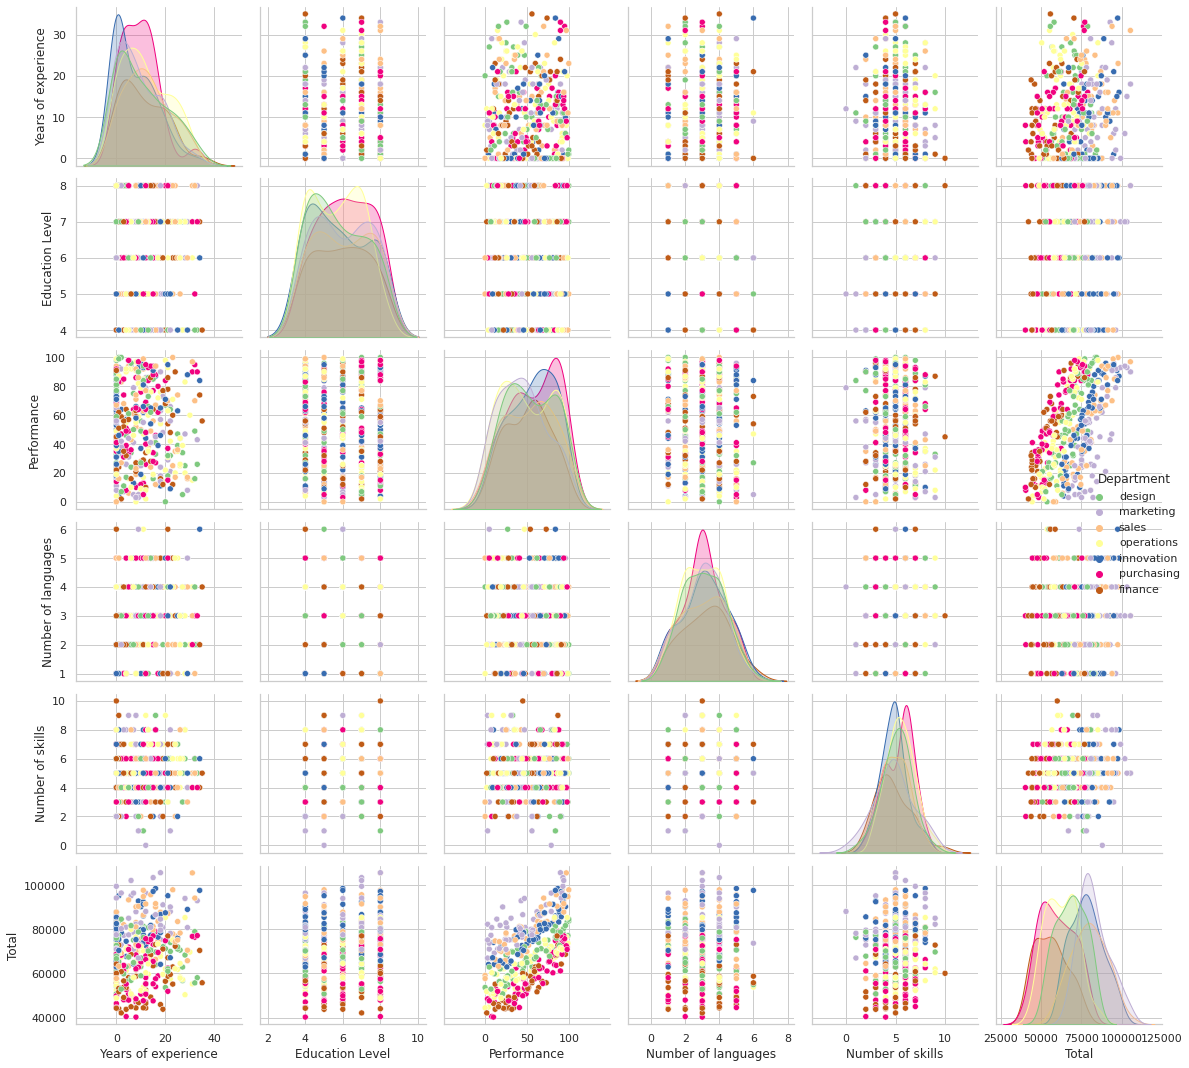

In [ ]:
%matplotlib inline

sns.set(style='whitegrid', context='notebook')
cols = ['Years of experience','Education Level', 'Department', 'Performance', 'Number of languages', 'Number of skills', 'Total']

sns.pairplot(df[cols], hue = 'Department', palette='Accent', size=2.5);
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


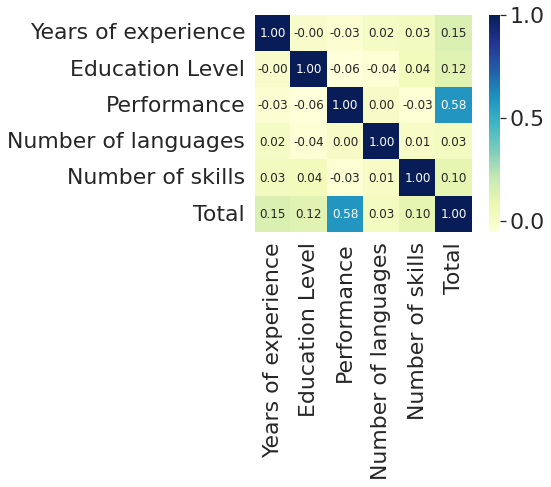

In [ ]:
#showing correlation among variables
cols = ['Years of experience','Education Level', 'Performance', 'Number of languages', 'Number of skills', 'Total']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 12},
            yticklabels=cols,
            xticklabels=cols,
             cmap='YlGnBu')

plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()